# XOR Classification

### Single layer로는 해결이 불가능한 XOR Problem을 tensorflow로 MLP를 구현하여 해결해보고자 한다.

In [12]:
##tenssorflow==2.3 환경에서 구현  
import tensorflow as tf
import numpy as np
# Multilayer perceptron에 필요한 weigh와 bias 변수 설정
w1 = tf.Variable(tf.random.uniform([2,1]))
b1 = tf.Variable(tf.random.uniform([1]))
w2 = tf.Variable(tf.random.uniform([2,1]))
b2 = tf.Variable(tf.random.uniform([1]))
w3 = tf.Variable(tf.random.uniform([2,1]))
b3 = tf.Variable(tf.random.uniform([1]))

label_x=np.array([[0,0],[1,0],[0,1],[1,1]],dtype=np.float32) #XOR data
label_y=np.array([[0],[1],[1],[0]],dtype=np.float32) #XOR label

In [13]:
#loss function 정의
def loss_function():
# neuron마다 sigmoid function을 거쳐 값을 도출 한 후, 최종적으로 cross entropy loss를 loss function으로 loss 값도출
  layer1_1= tf.sigmoid(tf.matmul(label_x,w1)+b1)
  layer1_2= tf.sigmoid(tf.matmul(label_x,w2)+b2)
  layer2 = tf.reshape([layer1_1, layer1_2], shape = [-1,2])
  pred_y = tf.sigmoid(tf.matmul(layer2, w3) + b3)
  cost = -tf.reduce_mean(label_y * tf.math.log(pred_y) + (1 - label_y) * tf.math.log(1 - pred_y))#cross entropy loss를 loss function으로 활용
  return cost
optimizer = tf.optimizers.Adam(learning_rate=0.01) #보편적으로 가장 많이 사용하는 adam optimizer 활용

for step in range(10000): #train
    cost_val=optimizer.minimize(loss_function, var_list=[w1,w2,w3,b1,b2,b3])
    if step % 100 == 0:
        print(step,"loss_value:", loss_function().numpy())

0 loss_value: 0.7062585
100 loss_value: 0.6292437
200 loss_value: 0.26391748
300 loss_value: 0.11110613
400 loss_value: 0.06110281
500 loss_value: 0.039356276
600 loss_value: 0.027819028
700 loss_value: 0.020877728
800 loss_value: 0.016332662
900 loss_value: 0.013171135
1000 loss_value: 0.010870367
1100 loss_value: 0.009136369
1200 loss_value: 0.007792495
1300 loss_value: 0.00672694
1400 loss_value: 0.0058660153
1500 loss_value: 0.0051591946
1600 loss_value: 0.00457095
1700 loss_value: 0.004075613
1800 loss_value: 0.003654155
1900 loss_value: 0.0032922842
2000 loss_value: 0.0029791528
2100 loss_value: 0.0027062977
2200 loss_value: 0.00246687
2300 loss_value: 0.0022556456
2400 loss_value: 0.0020683492
2500 loss_value: 0.0019014125
2600 loss_value: 0.0017520624
2700 loss_value: 0.0016178575
2800 loss_value: 0.0014968361
2900 loss_value: 0.0013873212
3000 loss_value: 0.0012879812
3100 loss_value: 0.0011975591
3200 loss_value: 0.0011150381
3300 loss_value: 0.0010395356
3400 loss_value: 0.0

In [15]:
#최종 train accuracy 측정
layer1_1= tf.sigmoid(tf.matmul(label_x,w1)+b1)
layer1_2= tf.sigmoid(tf.matmul(label_x,w2)+b2)
layer2 = tf.reshape([layer1_1, layer1_2], shape = [-1,2])
pred_y = tf.sigmoid(tf.matmul(layer2, w3) + b3)
pred_final = tf.cast(pred_y > 0.5,dtype=tf.float32) #0,1로 구성된 모델이 예측한 xor problem 결과
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred_final,label_y),dtype=tf.float32))
print("accuracy:", accuracy.numpy())
print(pred_final)

accuracy: 1.0
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)


## plot result

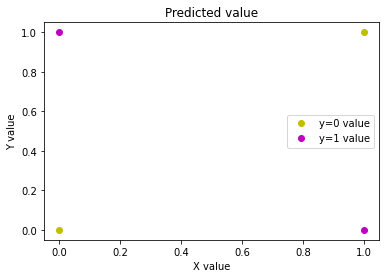

In [16]:
import matplotlib.pyplot as plt
pred_final=np.array(pred_final)
#label_x,test_x 데이터에서 x축, y축 데이터 분리
label_x_x1=label_x[:,0]
label_x_y1=label_x[:,1]


#시각화를 위해 label y가 0인 데이터와 1인 데이터를 분리한 후, 결과 plot
label_y=np.squeeze(label_y)
pred_final=np.squeeze(pred_final)

label_x_x1_0=label_x_x1[label_y==0] 
label_x_x1_1=label_x_x1[label_y==1]
label_x_y1_0=label_x_y1[label_y==0] 
label_x_y1_1=label_x_y1[label_y==1]
# original data plot
plt.title("Original data")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.plot(label_x_x1_0, label_x_y1_0, 'ro', label='y=0 train data')
plt.plot(label_x_x1_1, label_x_y1_1,'bo', label='y=1 train data')
plt.legend()
plt.show()


pred_x_x1_0=label_x_x1[pred_final==0] 
pred_x_x1_1=label_x_x1[pred_final==1]
pred_x_y1_0=label_x_y1[pred_final==0] 
pred_x_y1_1=label_x_y1[pred_final==1]

# preidicted value plot
plt.title("Predicted value")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.plot(pred_x_x1_0, pred_x_y1_0, 'yo', label='y=0 value')
plt.plot(pred_x_x1_1, pred_x_y1_1,'mo', label='y=1 value')
plt.legend()
plt.show()